In [38]:
from pathlib import Path

from pymol import cmd

import src.colorscheme as color

cmd.reinitialize()

WD = Path("CR")
PDB1 = WD / "7RP4_A_RAS.pdb"
PDB2 = WD / "FM_13_RAS.pdb"
PDB3 = WD / "SM_27_RAS.pdb"
cmd.load(PDB1, "PDB1")
cmd.load(PDB2, "PDB2")
cmd.load(PDB3, "PDB3")
cmd.align("PDB2", "PDB1")
cmd.align("PDB3", "PDB1")

cmd.remove("solvent")

cmd.zoom("all")
# cmd.rotate("x", 15)
cmd.rotate("y", 90)
cmd.rotate("z", 65)

# PDB 1
cmd.show("cartoon", "PDB1 and polymer")
cmd.show("lines", "not polymer")
cmd.hide("cartoon", "PDB2")
cmd.hide("cartoon", "PDB3")
cmd.spectrum("b", f"0x{color.CS_FG_B[1:]} 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
cmd.png(str(WD / f"{PDB1.stem} ({PDB2.stem}).png"), width=1000, height=1000, dpi=300)

cmd.remove("not polymer")
# PDB 2
cmd.show("cartoon", "PDB2")
cmd.hide("cartoon", "PDB1")
cmd.hide("cartoon", "PDB3")
cmd.spectrum("b", f"0x{color.CS_FG_B[1:]} 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
cmd.png(str(WD / f"{PDB2.stem} ({PDB1.stem}).png"), width=1000, height=1000, dpi=300)
# PDB 3
cmd.show("cartoon", "PDB3")
cmd.hide("cartoon", "PDB1")
cmd.hide("cartoon", "PDB2")
cmd.spectrum("b", f"0x{color.CS_FG_B[1:]} 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
cmd.png(str(WD / f"{PDB3.stem} ({PDB1.stem}).png"), width=1000, height=1000, dpi=300)

1

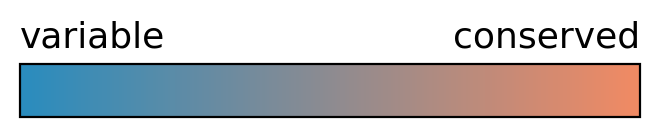

In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(4, 0.7), dpi=200)
fig.subplots_adjust(bottom=0.5)

cmap = mcolors.LinearSegmentedColormap.from_list("ramachandran_cmap", [color.CS_FG_B, color.CS_FG_A])
norm = mpl.colors.Normalize(vmin=0, vmax=9)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')
cb.set_ticks([])
cb.ax.text(0, 1.2, 'variable', transform=cb.ax.transAxes, ha='left', va='bottom', fontsize=13)
cb.ax.text(1.0, 1.2, 'conserved', transform=cb.ax.transAxes, ha='right', va='bottom', fontsize=13)
plt.show()